<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/randomforestANDgridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
drug = pd.read_csv(r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/drug200.csv')

In [7]:
drug = drug.drop('Sex', axis=1)

In [9]:
drug.head()

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,HIGH,HIGH,25.355,DrugY
1,47,LOW,HIGH,13.093,drugC
2,47,LOW,HIGH,10.114,drugC
3,28,NORMAL,HIGH,7.798,drugX
4,61,LOW,HIGH,18.043,DrugY


In [18]:
sns.set_style('white')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


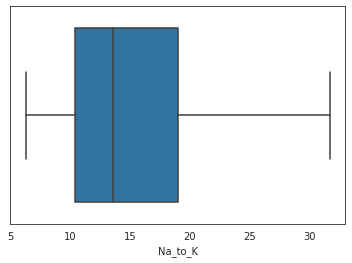

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


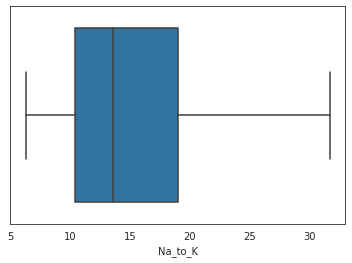

In [19]:
for i in range(2):
  Q1 = drug.Na_to_K.quantile(0.25)
  median = drug.Na_to_K.median()
  Q3 = drug.Na_to_K.quantile(0.75)

  IRQ = Q3-Q1

  max = np.max(drug.Na_to_K)
  min = np.min(drug.Na_to_K)

  Qinf = Q1 - 1.5*IRQ
  if Qinf < min:
    Qinf = min
  Qsup = Q3 + 1.5*IRQ
  if Qsup > max:
    Qsup = max

  drug = drug[(drug.Na_to_K >= Qinf ) & (drug.Na_to_K <= Qsup)]

  sns.boxplot(drug.Na_to_K)
  plt.show()

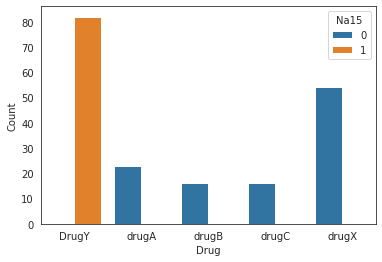

In [37]:
drug['Na15'] = [1 if i >= 15.015 else 0 for i in drug.Na_to_K]

drug.groupby(['Drug', 'Na15']).size().reset_index(name='Count')

sns.barplot(x='Drug', y='Count', hue='Na15', data=drug.groupby(['Drug', 'Na15']).size().reset_index(name='Count'))
plt.show()

In [38]:
drug.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Na15
0,23,HIGH,HIGH,25.355,DrugY,1
1,47,LOW,HIGH,13.093,drugC,0
2,47,LOW,HIGH,10.114,drugC,0
3,28,NORMAL,HIGH,7.798,drugX,0
4,61,LOW,HIGH,18.043,DrugY,1


In [54]:
from sklearn.impute import SimpleImputer

for i,j in zip(['NORMAL', 'HIGH'], [0,1]):

  si = SimpleImputer(missing_values=i, strategy='constant', fill_value=j)

  si.fit(drug.Cholesterol[:, np.newaxis])

  drug.Cholesterol = si.transform(drug.Cholesterol[:, np.newaxis])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to 

In [55]:
drug.Cholesterol.value_counts()

1    99
0    92
Name: Cholesterol, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

y = drug.loc[:,'Drug']
X = drug.loc[:,['Age', 'BP', 'Cholesterol', 'Na_to_K', 'Na15']]

for i in X.columns:

  X[i] = X[i].astype(float)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

pred = rf.predict(X_test)


In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

1.0

In [74]:
RandomForestClassifier()

In [47]:
X.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [103]:
params = [{'n_estimators': [100, 1000, 100],
           'criterion':['gini', 'entropy']}]

In [104]:
from sklearn.model_selection import GridSearchCV

gr = GridSearchCV(cv=5, scoring='accuracy', n_jobs=-1, param_grid=params, estimator=RandomForestClassifier())

In [105]:
gr.fit(X_train , y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [106]:
gr.best_params_

{'criterion': 'gini', 'n_estimators': 1000}

In [107]:
y_pred = gr.best_estimator_.predict(X_test)

In [108]:
accuracy_score(y_test, y_pred)

1.0